In [1]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed
#import for zscore
from scipy import stats

In [2]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [3]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub2_y_test=pd.DataFrame(sub2_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [4]:
sub3_x_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1392,2132,1811,-90,2567,-493,1254,-1096,-667,426,...,1818,2280,553,4157,-1699,-475,1357,-705,-15,-1290
1,842,1850,1461,-350,2478,-679,1124,-1289,-1089,-19,...,1561,2097,310,3730,-1913,-707,1163,-897,-385,-1558
2,582,1912,1505,-237,2689,-532,1366,-961,-1035,3,...,1705,2444,501,3661,-2251,-583,1336,-549,-391,-1414
3,183,1679,1387,-458,2593,-688,1387,-832,-1125,-255,...,1559,2600,387,3425,-2537,-700,1108,-488,-596,-1576
4,-253,1145,1039,-1032,2176,-1130,1125,-1003,-1442,-864,...,1085,2396,-109,2991,-2317,-1048,373,-786,-1008,-2088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,434,2065,370,31,946,475,980,1776,1213,-748,...,854,-844,-1326,907,1462,1630,1255,187,846,1653
399996,521,2200,518,297,1073,700,922,1859,1443,-544,...,974,-682,-1192,923,760,1851,1365,432,1009,1584
399997,309,2077,492,242,895,689,753,1677,1158,-554,...,839,-853,-1382,772,692,1822,1235,402,852,1240
399998,45,1931,415,73,710,681,642,1443,711,-574,...,668,-1216,-1629,657,1274,1683,1078,336,642,950


<Axes: >

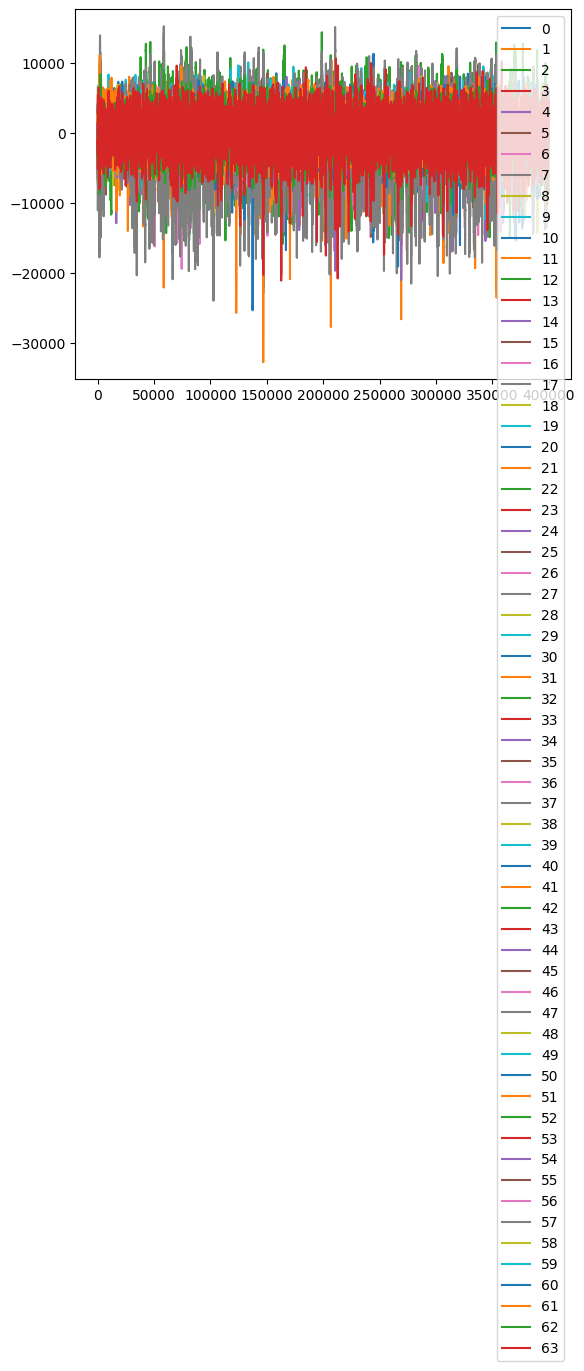

In [7]:
sub3_x_train.plot()

In [5]:
#apply zscore on x_train data and clip the outliers
#import zscore
from scipy import stats
from scipy.stats import zscore
sub3_x_train_final = sub3_x_train.apply(zscore)
sub3_x_train_final = sub3_x_train_final.clip(-3,3)

sub3_x_train_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.006065,0.000793,0.002057,0.000304,0.002024,0.000387,0.000265,0.000458,0.004530,0.002130,...,0.013579,0.002071,0.002362,0.011812,0.000180,0.000499,0.002605,-0.000415,0.000309,0.007052
std,0.971604,0.994763,0.989294,0.997227,0.990383,0.994650,0.995061,0.997059,0.980218,0.991646,...,0.931082,0.990830,0.990984,0.957284,0.996011,0.995969,0.984319,0.998490,0.996684,0.968289
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.618335,-0.642717,-0.632922,-0.666490,-0.636502,-0.671626,-0.651476,-0.657793,-0.597834,-0.636170,...,-0.524863,-0.635653,-0.623635,-0.333214,-0.663903,-0.656125,-0.646377,-0.747668,-0.684679,-0.591712
50%,0.023055,0.018265,0.040580,0.004295,0.021109,-0.002482,0.008874,0.020071,0.046288,0.018974,...,0.056610,0.059796,0.059337,0.137041,0.005682,0.013989,0.005156,-0.073165,-0.024632,0.044984
75%,0.657895,0.666603,0.673684,0.675758,0.669522,0.671443,0.659781,0.675885,0.674014,0.661016,...,0.616910,0.700306,0.678830,0.567987,0.671104,0.669640,0.658930,0.747094,0.681277,0.652989
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


<Axes: >

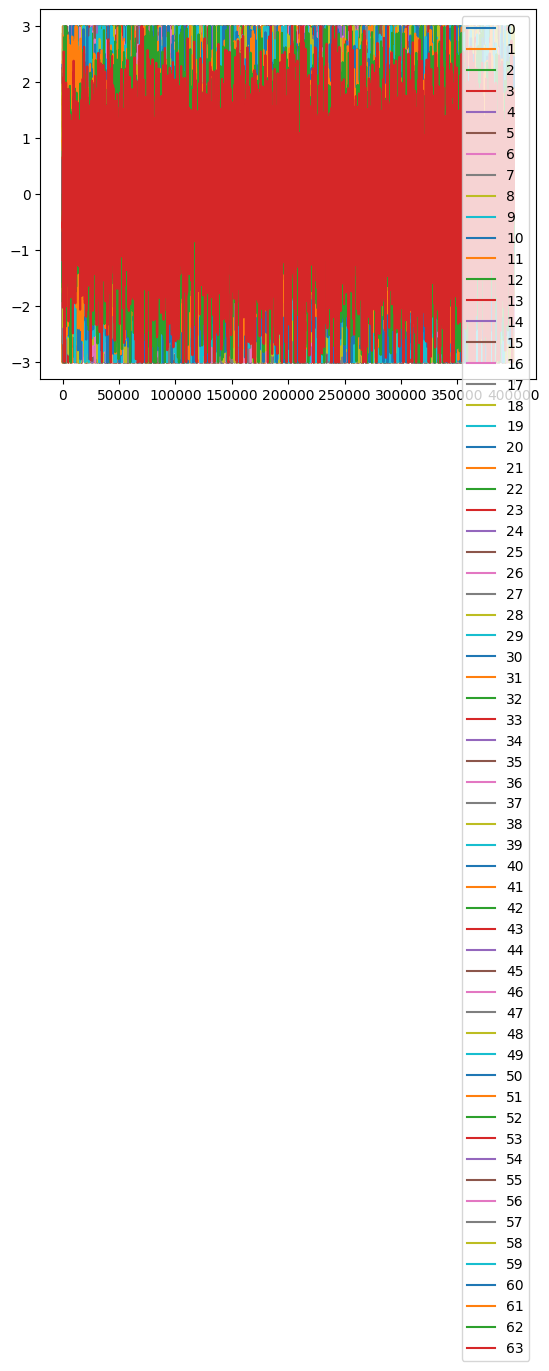

In [9]:
sub3_x_train_final.plot()

In [6]:
#apply zscore and clip it too on test data
sub3_x_test_final = sub3_x_test.apply(zscore)
sub3_x_test_final = sub3_x_test_final.clip(-3,3)

sub3_x_test_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.009208,0.001181,0.002457,-0.000188,0.001675,0.000109,0.000418,0.000910,0.008425,0.000818,...,0.020072,0.002741,0.001191,0.012019,-0.000050,0.001171,0.002387,-0.000959,0.002205,0.007469
std,0.956264,0.993226,0.988099,0.996325,0.986612,0.997377,0.993016,0.996486,0.967029,0.994082,...,0.891118,0.989503,0.994682,0.957237,0.996191,0.993914,0.986502,0.996482,0.991829,0.965522
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.588305,-0.642354,-0.604375,-0.673352,-0.645601,-0.673570,-0.609523,-0.653730,-0.537884,-0.641157,...,-0.470614,-0.628038,-0.648798,-0.313930,-0.666445,-0.643925,-0.658082,-0.731872,-0.647473,-0.594010
50%,0.038950,0.019358,0.046875,0.009793,0.008130,0.002024,0.028998,0.023898,0.068090,0.009838,...,0.057259,0.037821,0.029908,0.132334,-0.014795,0.022107,-0.001452,-0.076868,-0.010165,0.032078
75%,0.634872,0.663900,0.657006,0.665279,0.656696,0.675572,0.641903,0.676534,0.637423,0.656006,...,0.566136,0.683489,0.682316,0.554655,0.661634,0.669166,0.663698,0.718105,0.653845,0.646783
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


<Axes: >

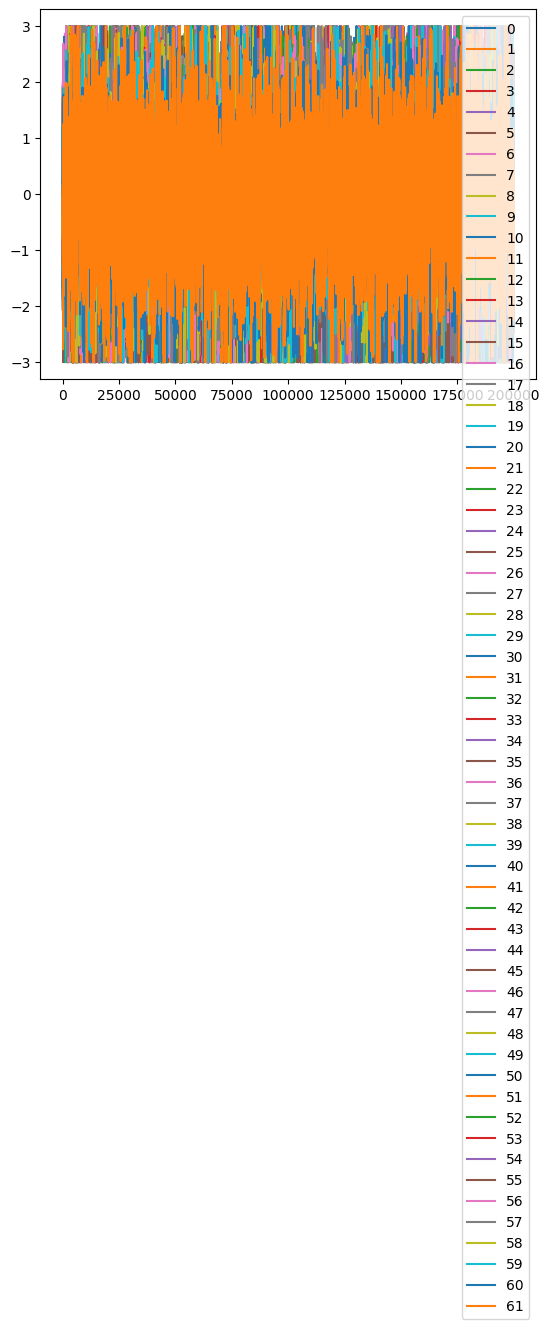

In [ ]:
sub3_x_test_final.plot()

In [7]:
sub3_y_test

,0,1,2,3,4
0,-0.128054,0.363715,-0.188113,0.037329,0.353174
1,-0.127698,0.366526,-0.186823,0.043591,0.361917
2,-0.127338,0.369386,-0.185515,0.049967,0.370876
3,-0.126976,0.372297,-0.184190,0.056457,0.380051
4,-0.126610,0.375258,-0.182847,0.063061,0.389445
...,...,...,...,...,...
199995,0.149179,-0.267619,0.042094,0.549439,0.170671
199996,0.147151,-0.262582,0.042869,0.545693,0.170275
199997,0.145111,-0.257577,0.043591,0.541763,0.169794
199998,0.143062,-0.252606,0.044262,0.537656,0.169230


In [8]:
#train a linear regression model on x_train_final and y_train and then find correlation with final y_test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(sub3_x_train_final, sub3_y_train)
y_pred = regressor.predict(sub3_x_test_final)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df 

,0,1,2,3,4
0,0.181238,0.298185,-0.019959,0.225061,0.307932
1,0.149707,0.265588,-0.035517,0.205549,0.290611
2,0.095370,0.179254,-0.062263,0.137870,0.222901
3,0.064377,0.180191,-0.059024,0.120394,0.209005
4,0.045405,0.244816,-0.038927,0.146251,0.244850
...,...,...,...,...,...
199995,0.088218,0.200818,-0.165474,-0.042931,0.044718
199996,0.153012,0.258312,-0.152523,-0.001098,0.078080
199997,0.233240,0.359968,-0.110906,0.089827,0.138598
199998,0.259512,0.367263,-0.100449,0.116814,0.135003


In [9]:
#find correlation between y_pred and y_test
from scipy.stats import pearsonr
array1 = np.array(sub3_y_test)
array2 = np.array(y_pred_df)
corr, _ = pearsonr(array1.flatten(), array2.flatten())
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.237
